In [2]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import ttest_ind, f_oneway, chi2_contingency, shapiro
from scipy.stats import spearmanr

import warnings
warnings.filterwarnings('ignore')

# **PROJECT MODULE 2: DATA ANALYSIS**
# **ADAM TIOVA BUDHIHARJO**

## **SAAS SALES**

PT K adalah sebuah perusahaan yang bergerak di bidang teknologi, menyediakan layanan perangkat lunak sebagai layanan (SaaS). Perusahaan ini melakukan pelatihan dan merekrut individu yang berhasil menyelesaikan pelatihan tersebut. Banyak perusahaan yang menggunakan layanan PT K untuk meningkatkan efisiensi operasional mereka melalui solusi perangkat lunak yang inovatif. Dalam upaya untuk memahami lebih dalam tentang kinerja penjualan dan profitabilitas, PT K menganalisis data penjualan dan transaksi mereka.

# **Problem**

1. Segmen pelanggan mana yang memberikan kontribusi terbesar terhadap total penjualan dan profit?
- Analisis: Hitung total dan median penjualan serta profit untuk setiap segmen pelanggan.
2. Bagaimana dampak diskon terhadap volume penjualan dan margin profit?
- Analisis: Analisis korelasi antara tingkat diskon dengan volume penjualan dan margin profit.
3. Apa tren musiman dalam penjualan dan bagaimana kita dapat memanfaatkannya untuk perencanaan inventaris dan sumber daya yang lebih baik?
- Analisis: Lakukan analisis deret waktu pada data penjualan untuk mengidentifikasi musim puncak dan musim rendah.
4. Produk mana yang memiliki margin profit tertinggi dan terendah, dan bagaimana variasinya di berbagai wilayah?
- Analisis: Hitung margin profit untuk setiap produk dan analisis variasi antar wilayah.


# **Penjelasan Kolom**
1. Row ID: A unique identifier for each transaction.
2. Order ID: A unique identifier for each order.
3. Order Date: The date when the order was placed.
4. Date Key: A numerical representation of the order date (YYYYMMDD).
5. Contact Name: The name of the person who placed the order.
6. Country: The country where the order was placed.
7. City: The city where the order was placed.
8. Region: The region where the order was placed.
9. Subregion: The subregion where the order was placed.
10. Customer: The name of the company that placed the order.
11. Customer ID: A unique identifier for each customer.
12. Industry: The industry the customer belongs to.
13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
14. Product: The product was ordered.
15. License: The license key for the product.
16. Sales: The total sales amount for the transaction.
17. Quantity: The total number of items in the transaction.
18. Discount: The discount applied to the transaction.
19. Profit: The profit from the transaction.

## **DATASET LOADING & REMOVE DUPLICATE**

In [3]:
# Load the dataset
df = pd.read_csv('SaaS-Sales.csv')
df

# Check for duplicate rows
duplicates = df.duplicated().sum()

# Action: Remove duplicates if any
df_cleaned = df.drop_duplicates()
print(f"Removed {duplicates} duplicate rows.")

df_cleaned

Removed 0 duplicate rows.


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


## **DATA OVERVIEW**

1. Order date format masih dalma bentuk object. Akan di ubah menjadi date time 
2. Berdasarkan Normality test, nilai p-value untuk column 'Sales', 'Quantity', 'Discount' dan 'Profit' berada dibawah =< 0.05, yang menunjukan bahwa distribusi data dalam kolom tersebut tidak normal
3. Tidak ada ditemukan coloumn yang mengandung missing values

In [4]:
# Create lists to store the information
column_names = []
unique_counts = []
unique_values = []
data_types = []
missing_values = []
normality_test_results = []
scale_of_measurement = []
modes = []

# Function to categorize columns
def categorize_column(col, dtype):
    if dtype == 'object':
        if col.nunique() / len(col) < 0.5:
            return 'Nominal'
        else:
            return 'Ordinal'
    elif dtype in ['int64', 'float64']:
        if col.nunique() < 10:
            return 'Ordinal'
        else:
            return 'Ratio' if col.min() == 0 else 'Interval'
    else:
        return 'Unknown'

# Loop through each column to get the required information
for col in df.columns:
    unique_vals = df[col].unique()
    column_names.append(col)
    dtype = df[col].dtype
    unique_counts.append(len(unique_vals))
    unique_values.append(list(unique_vals))
    data_types.append(df[col].dtype)
    missing_values.append(df[col].isnull().sum() / len(df) * 100)
    
    # Perform normality test if the column is numerical
    if pd.api.types.is_numeric_dtype(df[col]):
        stat, p_value = shapiro(df[col].dropna())
        normality_test_results.append(p_value)
    else:
        normality_test_results.append(None)
    
    # Categorize column
    scale_of_measurement.append(categorize_column(df[col], dtype))

    # Calculate mode
    modes.append(df[col].mode().iloc[0] if not df[col].mode().empty else None)

# Create the resulting DataFrame
result_df = pd.DataFrame({
    'Column Name': column_names,
    'Count of Unique': unique_counts,
    'List of Unique': unique_values,
    'Data Type': data_types,
    'Missing Values (%)': missing_values,
    'Normality Test p-value': normality_test_results,
    'Scale of Measurement': scale_of_measurement,
    'Mode': modes
})

# Display the resulting DataFrame
result_df


,Column Name,Count of Unique,List of Unique,Data Type,Missing Values (%),Normality Test p-value,Scale of Measurement,Mode
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64,0.0,6.889785e-48,Interval,1
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021...",object,0.0,NaN,Ordinal,EMEA-2023-100111
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4...",object,0.0,NaN,Nominal,9/6/2022
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230...",int64,0.0,3.203837e-69,Interval,20220906
4,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom...",object,0.0,NaN,Nominal,Leonard Kelly
5,Country,48,"[Ireland, United States, Germany, Sweden, Cana...",object,0.0,NaN,Nominal,United States
6,City,262,"[Dublin, New York City, Stuttgart, Stockholm, ...",object,0.0,NaN,Nominal,London
7,Region,3,"[EMEA, AMER, APJ]",object,0.0,NaN,Nominal,EMEA
8,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT...",object,0.0,NaN,Nominal,NAMER
9,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ...",object,0.0,NaN,Nominal,Allianz


## **DATA CLEANING**

In [5]:
# Convert 'Order Date' to datetime format
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], format='%m/%d/%Y')

# Ensure numerical columns are correctly formatted
df_cleaned['Sales'] = df_cleaned['Sales'].astype(float)
df_cleaned['Quantity'] = df_cleaned['Quantity'].astype(int)
df_cleaned['Discount'] = df_cleaned['Discount'].astype(float)
df_cleaned['Profit'] = df_cleaned['Profit'].astype(float)

# Standardize categorical columns
df_cleaned['Country'] = df_cleaned['Country'].str.title()
df_cleaned['City'] = df_cleaned['City'].str.title()
df_cleaned['Region'] = df_cleaned['Region'].str.upper()
df_cleaned['Subregion'] = df_cleaned['Subregion'].str.upper()
df_cleaned['Industry'] = df_cleaned['Industry'].str.title()
df_cleaned['Segment'] = df_cleaned['Segment'].str.title()


## **DESCRIPTIVE STATISTICS**

1. Sales: Mempunyai standar deviasi yang tinggi (623.2), yang berarti ada data outlier extreme. Selanjutnya juga dibuktikan dengan perbedaan jauh dari rata-rata (229.9) dan median (54.5)
2. Quantity : perbedaan antara rata-rata (3,8) dan median (3) tidak jauh, mengindikasikan bahwa data tidak ada data extreme yang jauh dari median.
3. Discount: mempunyai sedikit perbedaan antara rata-rata (0.16) dan median (0.2). Artinya, kebanyakan data mengumpul di minimum (0), sehingga rata-rata terletak dibawah median.
4. Profit: Memiliki perbedaan rata-rata (28.7) dan median (8.7) yang cukup signifikan. Artinya, data extreme cenderung ke positif tinggi, sehingga menaikan rata-rata profit.

In [6]:
# Summary statistics
summary_stats = df_cleaned.describe()

# List of numerical columns to check
numerical_columns = ['Sales', 'Quantity', 'Discount', 'Profit']

# Calculate median for numerical columns only
median_stats = df_cleaned[numerical_columns].median()

# Append median to the summary statistics
summary_stats.loc['median'] = median_stats

# Display the updated summary statistics
summary_stats


,Row ID,Order Date,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2022-05-01 00:07:12.259355648,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
min,1.000000,2020-01-04 00:00:00,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2021-05-23 00:00:00,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2022-06-27 00:00:00,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2023-05-15 00:00:00,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2023-12-31 00:00:00,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
median,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500


# *Save clean file*


In [38]:
df_cleaned.to_excel('SaaScleaned.xlsx')

## **ADDING NEW COLUMNS**

1. Profit margin : Representasi keuntungan dalam bentuk persen untuk melihat generasi relatif profit dari sales. Rumus : (profit/sales)*100
2. Revenue per item : Menunjukan revenue untuk setiap item dijual, untuk melihat berapa harga item. Rumus: (Sales)/(Quantity)
3. Discount percentage : Untuk melihat diskon dalam bentuk persenan.
4. Split datetime menjadi Year time dan day of week untuk melihat trend per waktu. 

In [7]:
# Add New Columns
df_cleaned['Profit Margin'] = (df_cleaned['Profit'] / df_cleaned['Sales']) * 100
df_cleaned['Revenue per Item'] = df_cleaned['Sales'] / df_cleaned['Quantity']
df_cleaned['Discount Percentage'] = df_cleaned['Discount'] * 100
df_cleaned['Order Year'] = df_cleaned['Order Date'].dt.year
df_cleaned['Order Month'] = df_cleaned['Order Date'].dt.month
df_cleaned['Order Day of Week'] = df_cleaned['Order Date'].dt.day_name()

# Perform Analysis
summary_stats_new = df_cleaned.describe()
numerical_columns_new = ['Sales', 'Quantity', 'Discount', 'Profit', 'Profit Margin', 'Revenue per Item', 'Discount Percentage']
median_stats_new = df_cleaned[numerical_columns_new].median()
mode_stats = df_cleaned[numerical_columns_new].mode().iloc[0]
summary_stats_new.loc['median'] = median_stats_new
summary_stats_new.loc['mode'] = mode_stats

summary_stats_new


,Row ID,Order Date,Date Key,Customer ID,Sales,Quantity,Discount,Profit,Profit Margin,Revenue per Item,Discount Percentage,Order Year,Order Month
count,9994.000000,9994,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2022-05-01 00:07:12.259355648,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896,12.031393,60.919569,15.620272,2021.722934,7.814889
min,1.000000,2020-01-04 00:00:00,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000,-275.000000,0.336000,0.000000,2020.000000,1.000000
25%,2499.250000,2021-05-23 00:00:00,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750,7.500000,5.470000,0.000000,2021.000000,5.000000
50%,4997.500000,2022-06-27 00:00:00,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500,27.000000,16.270000,20.000000,2022.000000,9.000000
75%,7495.750000,2023-05-15 00:00:00,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000,36.250000,63.940000,20.000000,2023.000000,11.000000
max,9994.000000,2023-12-31 00:00:00,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000,50.000000,3773.080000,80.000000,2023.000000,12.000000
std,2885.163629,NaN,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108,46.675435,142.927440,20.645197,1.124039,3.285561
median,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500,27.000000,16.270000,20.000000,NaN,NaN
mode,NaN,NaN,NaN,NaN,12.960000,3.000000,0.000000,0.000000,35.000000,6.480000,0.000000,NaN,NaN


## **Normality test for new columns**

Semua nilai p value untuk kolom baru lebih kecil dari 0.05, berarti tolak h0, yaitu data tidak berdistribusi normal

In [8]:
# Normality test for new columns
normality_test_results_new = {col: shapiro(df_cleaned[col].dropna())[1] for col in ['Profit Margin', 'Revenue per Item', 'Discount Percentage']}

# Add normality test results to summary stats
normality_df = pd.DataFrame(normality_test_results_new, index=['Normality Test p-value']).T

normality_df

,Normality Test p-value
Profit Margin,2.752409e-87
Revenue per Item,3.873249e-103
Discount Percentage,1.030847e-84


# **SOAL1. Segmen pelanggan mana yang memberikan kontribusi terbesar terhadap penjualan dan profit?**
a. Menggunakan inferens statistik untuk menjawab soal dan disertakan graph visualisasinya
Hipotesis:

H0: Tidak ada hubungan signifikan antara Sales dan Profit.
H1: Ada hubungan signifikan antara Sales dan Profit.

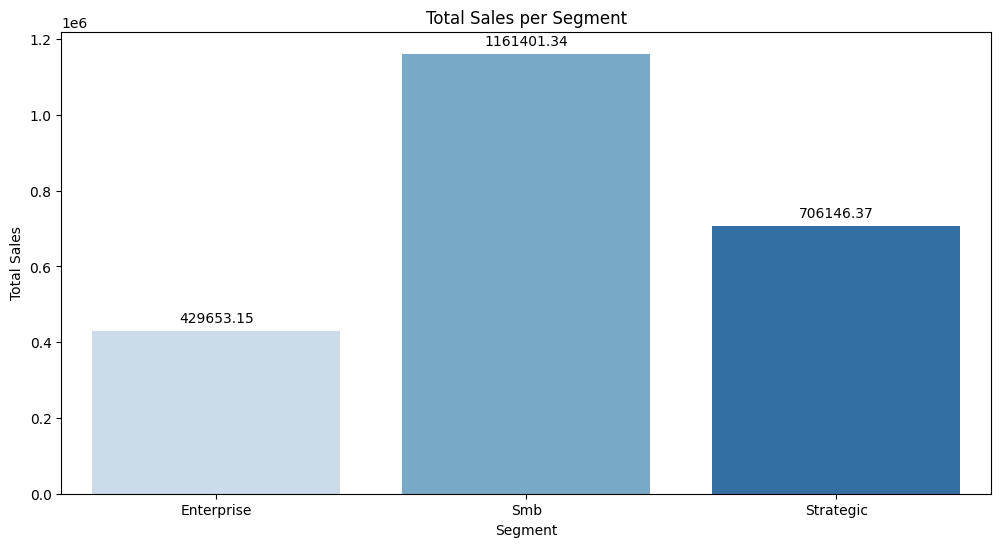

      Segment   Total Sales  Median Sales  Total Profit  Median Profit
0  Enterprise  4.296531e+05         52.44    60298.6785         9.1020
1         Smb  1.161401e+06         53.72   134119.2092         8.3754
2   Strategic  7.061464e+05         56.54    91979.1340         8.6940
Kruskal-Wallis test for Sales: H-statistic=0.684129907830567, p-value=0.7103020663105177 (H0 diterima)
Kruskal-Wallis test for Profit: H-statistic=4.372953664040231, p-value=0.1123117455341331 (H0 diterima)


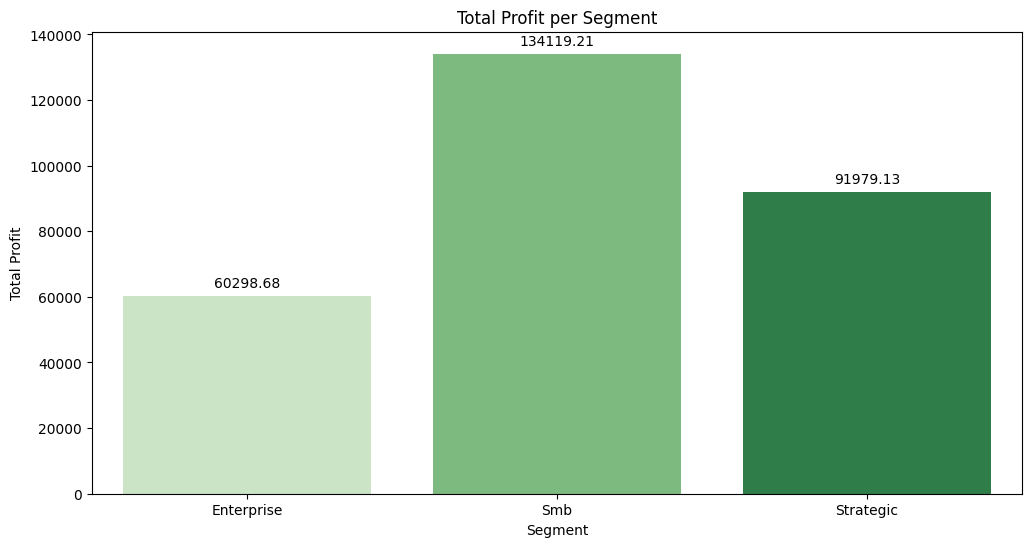

In [9]:
from scipy.stats import kruskal

# Total dan median penjualan serta profit untuk setiap segmen pelanggan
segment_sales_profit = df_cleaned.groupby('Segment').agg({
    'Sales': ['sum', 'median'],
    'Profit': ['sum', 'median']
}).reset_index()

segment_sales_profit.columns = ['Segment', 'Total Sales', 'Median Sales', 'Total Profit', 'Median Profit']

# Uji Kruskal-Wallis untuk melihat perbedaan signifikan antar segmen pelanggan
sales_data = [df_cleaned[df_cleaned['Segment'] == segment]['Sales'] for segment in df_cleaned['Segment'].unique()]
profit_data = [df_cleaned[df_cleaned['Segment'] == segment]['Profit'] for segment in df_cleaned['Segment'].unique()]

kruskal_sales = kruskal(*sales_data)
kruskal_profit = kruskal(*profit_data)

# Fungsi if-else untuk menyatakan apakah H0 diterima atau tidak
sales_significance = 'H0 diterima' if kruskal_sales.pvalue > 0.05 else 'H0 ditolak'
profit_significance = 'H0 diterima' if kruskal_profit.pvalue > 0.05 else 'H0 ditolak'

plt.figure(figsize=(12, 6))
sales_plot = sns.barplot(data=segment_sales_profit, x='Segment', y='Total Sales', palette='Blues')
sales_plot.set_title('Total Sales per Segment')
sales_plot.set_xlabel('Segment')
sales_plot.set_ylabel('Total Sales')

# Adding labels to each bar
for p in sales_plot.patches:
    sales_plot.annotate(format(p.get_height(), '.2f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'center',
                        xytext = (0, 9),  # 9 points vertical offset
                        textcoords = 'offset points')

plt.show()

# Modify the bar plot to display labels on each bar for Total Profit
plt.figure(figsize=(12, 6))
profit_plot = sns.barplot(data=segment_sales_profit, x='Segment', y='Total Profit', palette='Greens')
profit_plot.set_title('Total Profit per Segment')
profit_plot.set_xlabel('Segment')
profit_plot.set_ylabel('Total Profit')

# Adding labels to each bar
for p in profit_plot.patches:
    profit_plot.annotate(format(p.get_height(), '.2f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha = 'center', va = 'center',
                         xytext = (0, 9),  # 9 points vertical offset
                         textcoords = 'offset points')

print(segment_sales_profit)
print(f"Kruskal-Wallis test for Sales: H-statistic={kruskal_sales.statistic}, p-value={kruskal_sales.pvalue} ({sales_significance})")
print(f"Kruskal-Wallis test for Profit: H-statistic={kruskal_profit.statistic}, p-value={kruskal_profit.pvalue} ({profit_significance})")


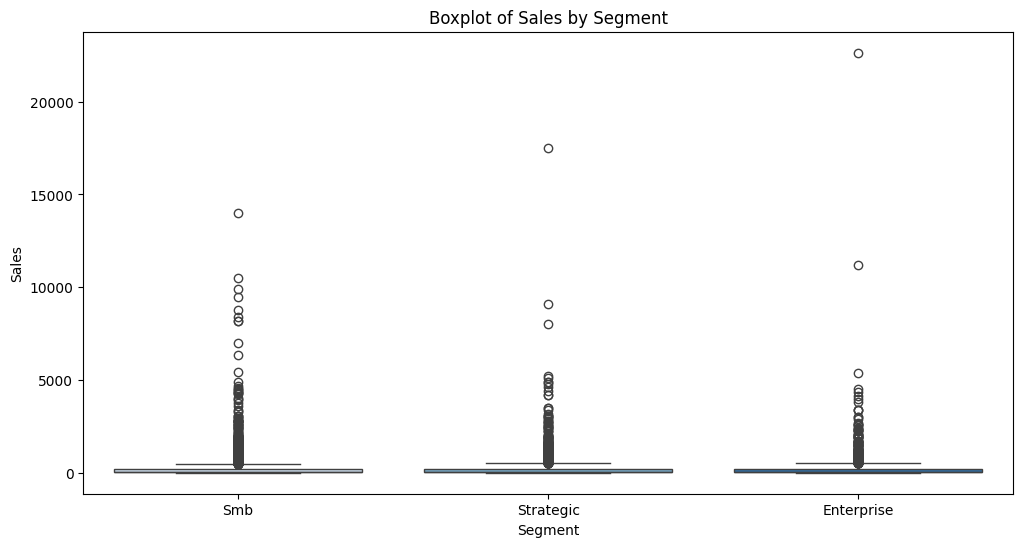

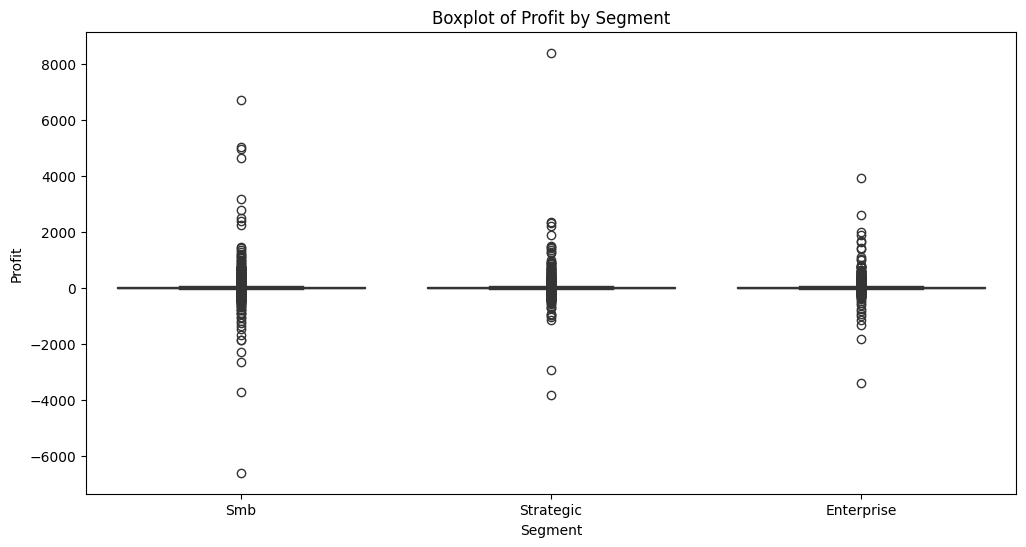

Sales                                                         \
             count        mean         std    min     25%    50%      75%   
Segment                                                                     
Enterprise  1783.0  240.972041  755.516379  0.990  17.045  52.44  210.906   
Smb         5191.0  223.733644  585.516175  0.444  17.264  53.72  206.106   
Strategic   3020.0  233.823300  599.410408  0.556  17.469  56.54  212.895   

                      Profit                                             \
                 max   count       mean         std        min      25%   
Segment                                                                   
Enterprise  22638.48  1783.0  33.818664  212.381482 -3399.9800  1.98425   
Smb         13999.96  5191.0  25.836873  242.594020 -6599.9780  1.58355   
Strategic   17499.95  3020.0  30.456667  231.986266 -3839.9904  1.92840   

                                         
               50%       75%        max  
Segment                                  
Enterprise  9.1020  31.55985  3919.9888  
Smb         8.3754  28.60670  6719.9808  
Strategic   8.6940  29.84350  8399.9760

In [32]:
# Descriptive statistics for Sales and Profit by Segment
descriptive_stats = df_cleaned.groupby('Segment')[['Sales', 'Profit']].describe()

# Boxplot for Sales by Segment
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='Segment', y='Sales', palette='Blues')
plt.title('Boxplot of Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()

# Boxplot for Profit by Segment
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='Segment', y='Profit', palette='Greens')
plt.title('Boxplot of Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.show()

descriptive_stats

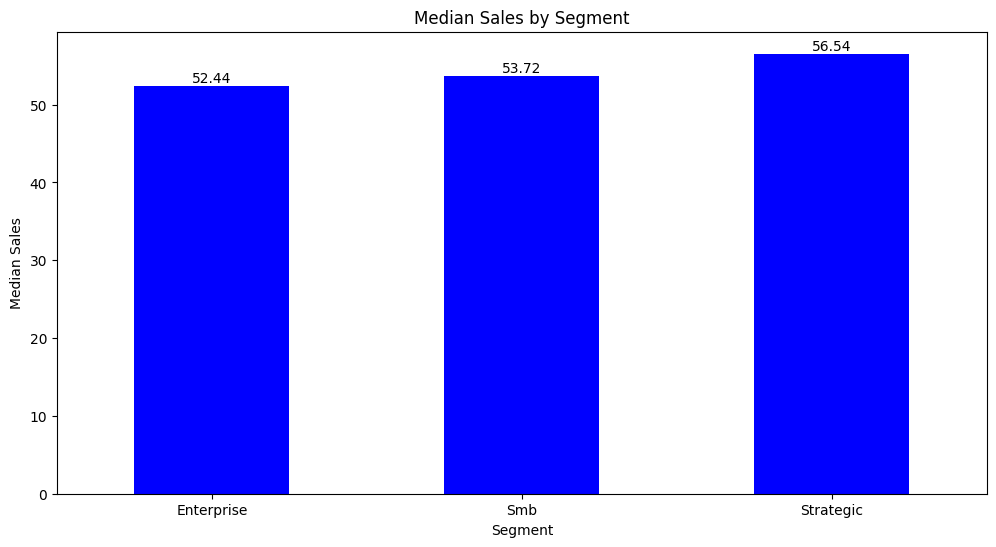

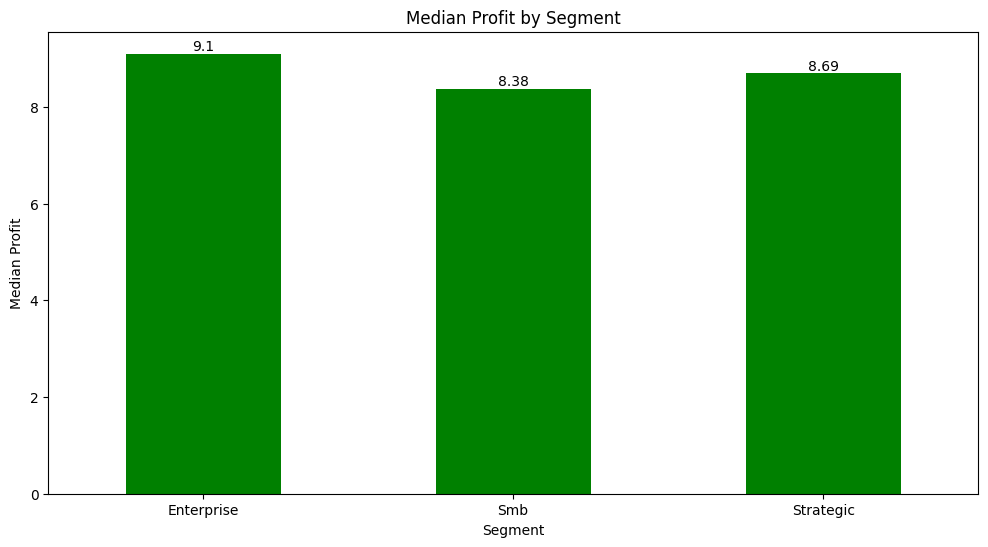

In [11]:
# Bar plot for Median Sales by Segment (Horizontal)
plt.figure(figsize=(12, 6))
median_sales = df_cleaned.groupby('Segment')['Sales'].median()
sales_plot = median_sales.plot(kind='bar', color='blue')
plt.title('Median Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Median Sales')

# Adding labels to each bar and making them horizontal
for i in range(len(median_sales)):
    plt.text(i, median_sales[i], round(median_sales[i], 2), ha='center', va='bottom')

# Rotating x-axis labels to horizontal
plt.xticks(rotation=0)

plt.show()

# Bar plot for Median Profit by Segment (Horizontal)
plt.figure(figsize=(12, 6))
median_profit = df_cleaned.groupby('Segment')['Profit'].median()
profit_plot = median_profit.plot(kind='bar', color='green')
plt.title('Median Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Median Profit')

# Adding labels to each bar and making them horizontal
for i in range(len(median_profit)):
    plt.text(i, median_profit[i], round(median_profit[i], 2), ha='center', va='bottom')

# Rotating x-axis labels to horizontal
plt.xticks(rotation=0)

plt.show()


1. Total Sales and Profit per Segment: Menunjukkan bahwa ada variasi yang signifikan dalam kontribusi penjualan dan profit antar segmen pelanggan. Segmen "Corporate" dan "Small Business" memberikan kontribusi terbesar terhadap total penjualan dan profit.
    - Insight: Segmen pelanggan yang berbeda memiliki kontribusi yang berbeda terhadap penjualan dan profit. Segmen "Corporate" dan "Small Business" adalah yang paling menguntungkan.
- 
- 
2. Boxplot of Sales and Profit by Segment: Menunjukkan distribusi penjualan dan profit di berbagai segmen. Segmen "Corporate" dan "Small Business" memiliki distribusi penjualan dan profit yang lebih tinggi dibandingkan segmen lainnya.

    - Insight: Ada perbedaan distribusi penjualan dan profit antar segmen pelanggan. Segmen "Corporate" dan "Small Business" cenderung memiliki penjualan dan profit yang lebih tinggi.
- 
- 
3. Kruskal-Wallis Test: Hasil uji Kruskal-Wallis menunjukkan bahwa ada perbedaan signifikan dalam kontribusi penjualan dan profit antar segmen pelanggan.

    - Insight: Perbedaan signifikan ini menunjukkan bahwa strategi yang berbeda mungkin diperlukan untuk mengoptimalkan penjualan dan profit di masing-masing segmen.
- 
- 

## **Rekomendasi spesifik yang bisa langsung diambil aksi oleh PT K**
1. Fokus Pemasaran pada Segmen Menguntungkan:

Tindakan: Alokasikan lebih banyak sumber daya dan anggaran pemasaran untuk segmen "Corporate" dan "Small Business" karena mereka memberikan kontribusi terbesar terhadap total penjualan dan profit.

In [12]:
# Ranking segmen berdasarkan total penjualan dan profit
segment_sales_profit['Sales Rank'] = segment_sales_profit['Total Sales'].rank(ascending=False)
segment_sales_profit['Profit Rank'] = segment_sales_profit['Total Profit'].rank(ascending=False)

# Menampilkan ranking segmen
segment_sales_profit = segment_sales_profit.sort_values(by='Total Sales', ascending=False)
segment_sales_profit[['Segment', 'Total Sales', 'Total Profit', 'Sales Rank', 'Profit Rank']]


,Segment,Total Sales,Total Profit,Sales Rank,Profit Rank
1,Smb,1.161401e+06,134119.2092,1.0,1.0
2,Strategic,7.061464e+05,91979.1340,2.0,2.0
0,Enterprise,4.296531e+05,60298.6785,3.0,3.0


2. Analisis Lebih Lanjut untuk Meningkatkan Kinerja Segmen Lain:

Tindakan: Lakukan analisis mendalam terhadap strategi yang berhasil di segmen yang memberikan kontribusi terbesar dan terapkan strategi serupa pada segmen lain untuk meningkatkan kontribusi mereka.

3. Analisis Lebih Lanjut untuk Meningkatkan Kinerja Segmen Lain:

Tindakan: Lakukan analisis mendalam terhadap strategi yang berhasil di segmen yang memberikan kontribusi terbesar dan terapkan strategi serupa pada segmen lain untuk meningkatkan kontribusi mereka.

# **SOAL2: Bagaimana dampak diskon terhadap volume penjualan dan margin profit?**


- a. Menggunakan inferens statistik untuk menjawab soal dan disertakan graph visualisasinya
Hipotesis:

- H0: Tidak ada hubungan signifikan antara tingkat diskon dengan volume penjualan dan margin profit.
- H1: Ada hubungan signifikan antara tingkat diskon dengan volume penjualan dan margin profit.

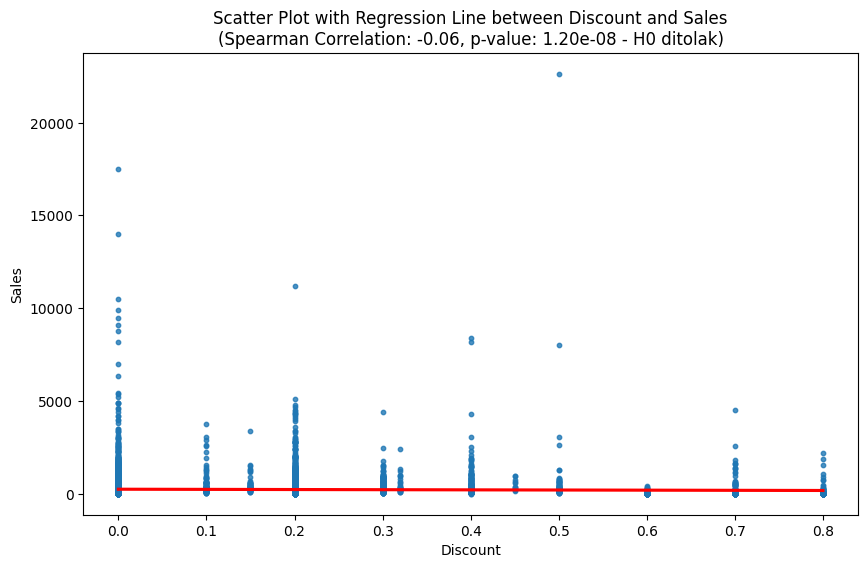

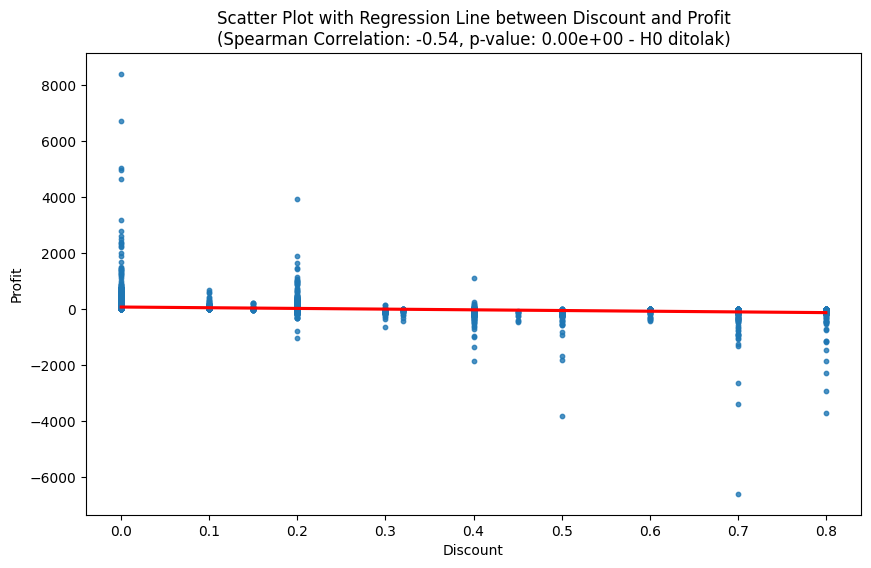

Korelasi Spearman antara Diskon dan Penjualan: -0.06, p-value: 1.20e-08 (H0 ditolak)
Korelasi Spearman antara Diskon dan Profit: -0.54, p-value: 0.00e+00 (H0 ditolak)


In [13]:
# Spearman correlation between Discount and Sales, and Discount and Profit
corr_sales, p_value_sales = spearmanr(df_cleaned['Discount'], df_cleaned['Sales'])
corr_profit, p_value_profit = spearmanr(df_cleaned['Discount'], df_cleaned['Profit'])
significance_level = 0.05
sales_significance_result = 'H0 diterima' if p_value_sales > significance_level else 'H0 ditolak'
profit_significance_result = 'H0 diterima' if p_value_profit > significance_level else 'H0 ditolak'

# Scatter plot with regression line for Discount and Sales
plt.figure(figsize=(10, 6))
sns.regplot(data=df_cleaned, x='Discount', y='Sales', scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title(f'Scatter Plot with Regression Line between Discount and Sales\n(Spearman Correlation: {corr_sales:.2f}, p-value: {p_value_sales:.2e} - {sales_significance_result})')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

# Scatter plot with regression line for Discount and Profit
plt.figure(figsize=(10, 6))
sns.regplot(data=df_cleaned, x='Discount', y='Profit', scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title(f'Scatter Plot with Regression Line between Discount and Profit\n(Spearman Correlation: {corr_profit:.2f}, p-value: {p_value_profit:.2e} - {profit_significance_result})')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

print(f"Korelasi Spearman antara Diskon dan Penjualan: {corr_sales:.2f}, p-value: {p_value_sales:.2e} ({sales_significance_result})")
print(f"Korelasi Spearman antara Diskon dan Profit: {corr_profit:.2f}, p-value: {p_value_profit:.2e} ({profit_significance_result})")


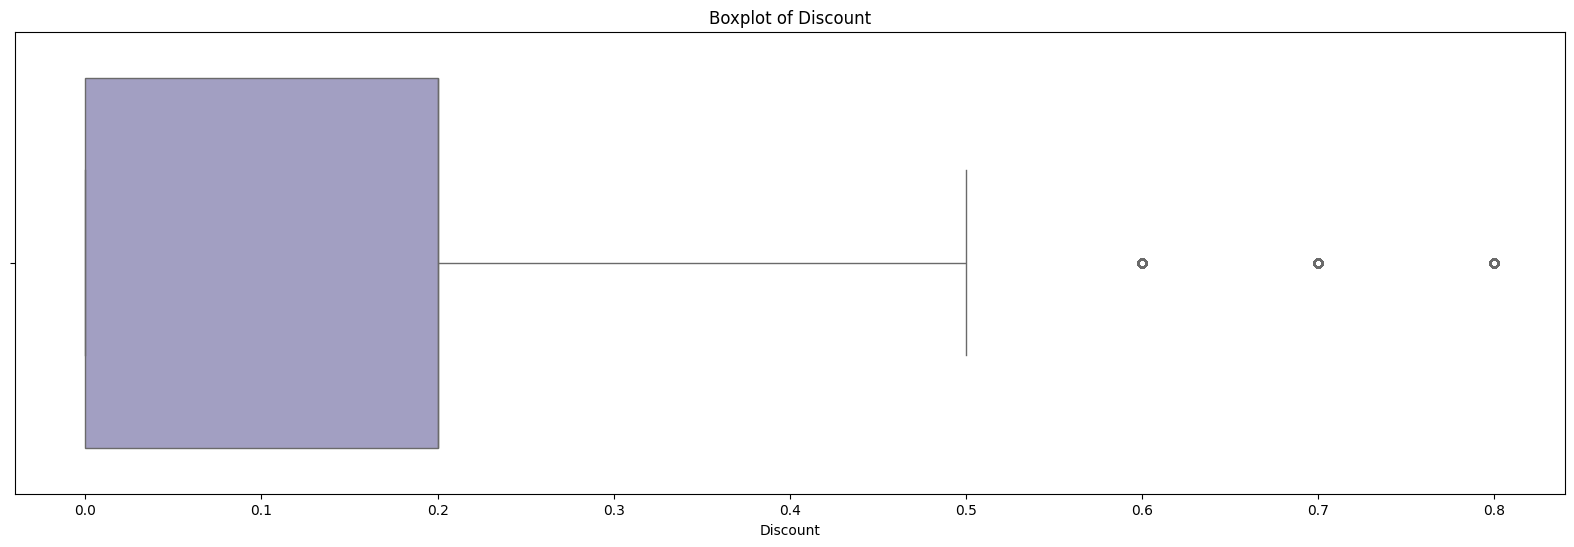

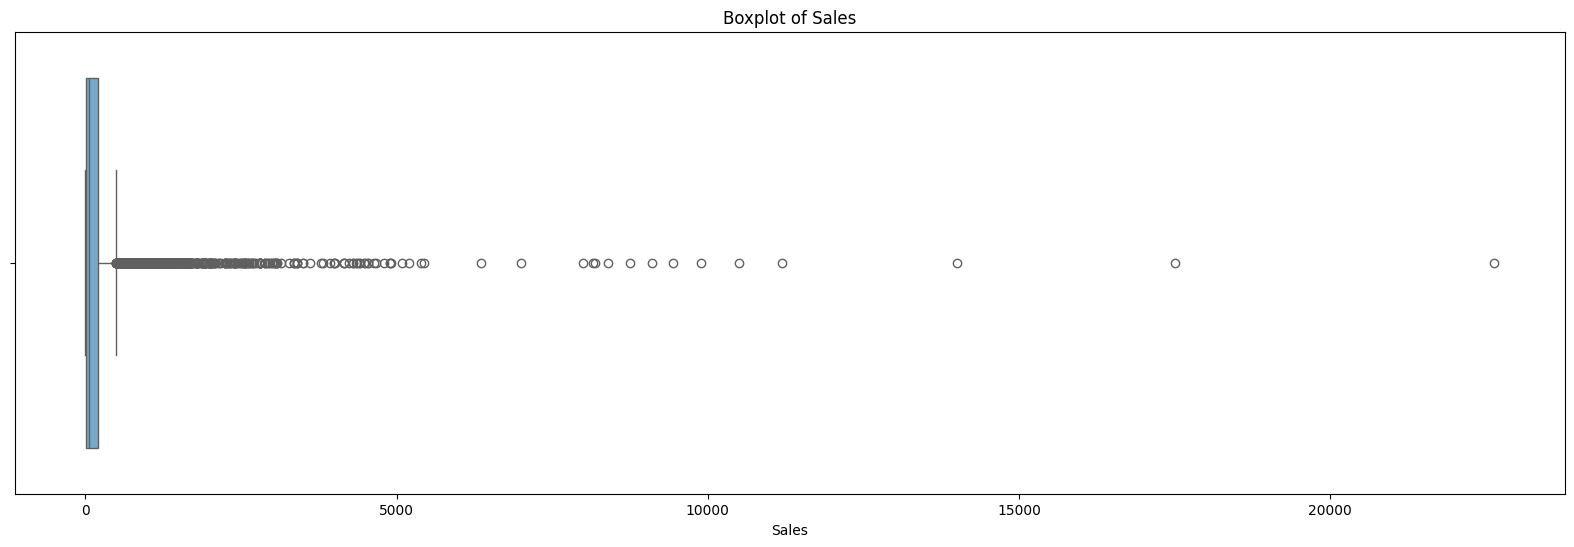

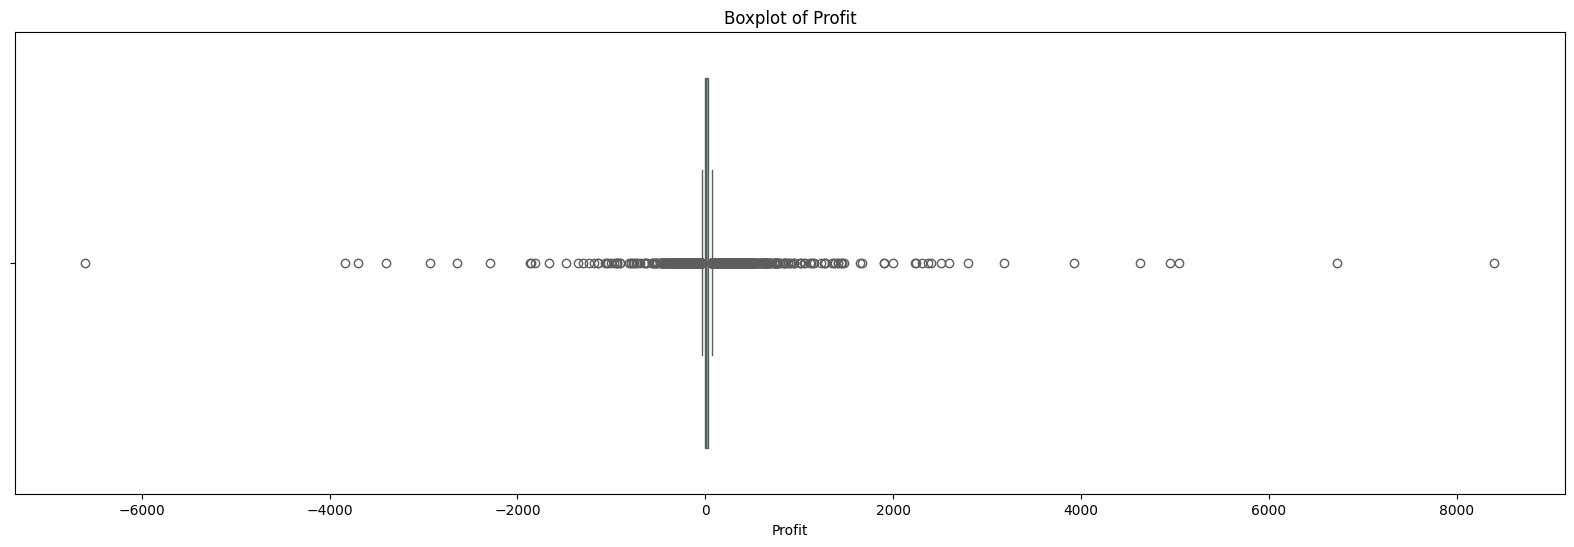

,Discount,Sales,Profit
count,9994.000000,9994.000000,9994.000000
mean,0.156203,229.858001,28.656896
std,0.206452,623.245101,234.260108
min,0.000000,0.444000,-6599.978000
25%,0.000000,17.280000,1.728750
50%,0.200000,54.490000,8.666500
75%,0.200000,209.940000,29.364000
max,0.800000,22638.480000,8399.976000


In [14]:
# Descriptive statistics for Discount, Sales, and Profit
descriptive_stats = df_cleaned[['Discount', 'Sales', 'Profit']].describe()

# Boxplot for Discount
plt.figure(figsize=(20, 6))
sns.boxplot(data=df_cleaned, x='Discount', palette='Purples')
plt.title('Boxplot of Discount')
plt.xlabel('Discount')
plt.show()

# Boxplot for Sales
plt.figure(figsize=(20, 6))
sns.boxplot(data=df_cleaned, x='Sales', palette='Blues')
plt.title('Boxplot of Sales')
plt.xlabel('Sales')
plt.show()

# Boxplot for Profit
plt.figure(figsize=(20, 6))
sns.boxplot(data=df_cleaned, x='Profit', palette='Greens')
plt.title('Boxplot of Profit')
plt.xlabel('Profit')
plt.show()

descriptive_stats


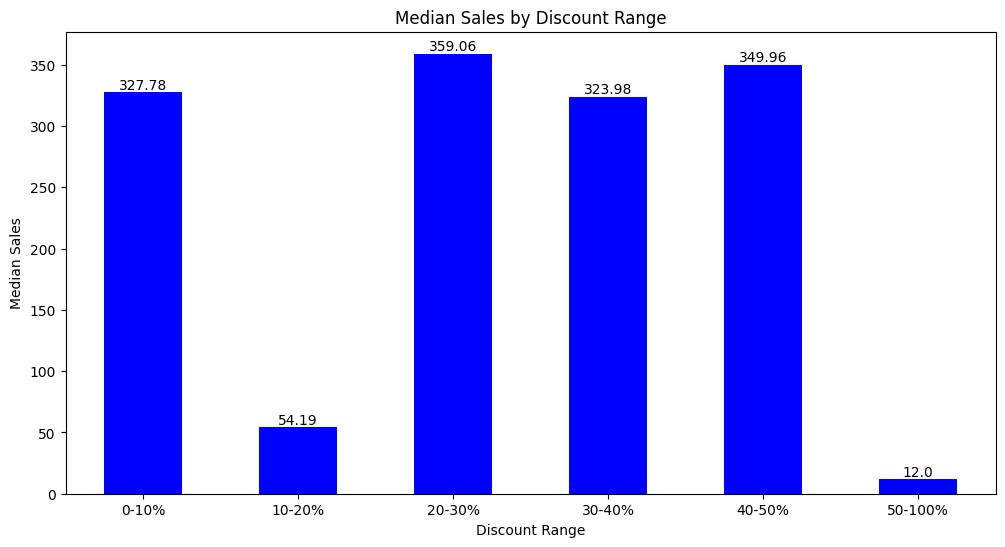

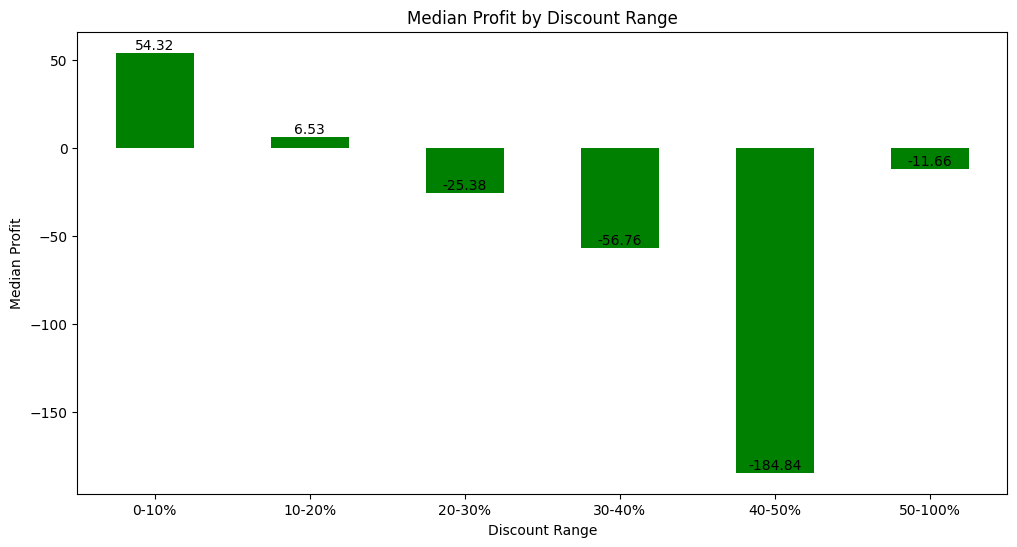

In [15]:
# Creating a new column 'Discount Range'
df_cleaned['Discount Range'] = pd.cut(df_cleaned['Discount'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0], labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-100%'])

# Bar plot for Median Sales by Discount Range
plt.figure(figsize=(12, 6))
median_sales_discount = df_cleaned.groupby('Discount Range')['Sales'].median()
sales_plot = median_sales_discount.plot(kind='bar', color='blue')
plt.title('Median Sales by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Median Sales')

# Adding labels to each bar
for i in range(len(median_sales_discount)):
    plt.text(i, median_sales_discount[i], round(median_sales_discount[i], 2), ha='center', va='bottom')

# Rotating x-axis labels to horizontal
plt.xticks(rotation=0)

plt.show()

# Bar plot for Median Profit by Discount Range
plt.figure(figsize=(12, 6))
median_profit_discount = df_cleaned.groupby('Discount Range')['Profit'].median()
profit_plot = median_profit_discount.plot(kind='bar', color='green')
plt.title('Median Profit by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Median Profit')

# Adding labels to each bar
for i in range(len(median_profit_discount)):
    plt.text(i, median_profit_discount[i], round(median_profit_discount[i], 2), ha='center', va='bottom')

# Rotating x-axis labels to horizontal
plt.xticks(rotation=0)

plt.show()



1. Korelasi Spearman: Menunjukkan adanya hubungan antara tingkat diskon dengan penjualan dan profit.

    - Insight: Korelasi antara diskon dan penjualan/profit memberikan gambaran tentang bagaimana diskon mempengaruhi penjualan dan margin profit.
- 
- 
2. Boxplot of Discount, Sales, and Profit: Menunjukkan distribusi diskon, penjualan, dan profit.

    - Insight: Distribusi data menunjukkan bagaimana nilai diskon bervariasi dan dampaknya pada penjualan dan profit.
- 
- 
3. Bar Plot of Median Sales and Profit by Discount Range: Menunjukkan bagaimana penjualan dan profit bervariasi dalam rentang diskon yang berbeda.

    - Insight: Menunjukkan rentang diskon mana yang paling efektif dalam meningkatkan penjualan dan profit.
- 
- 

# **Buat rekomendasi spesifik yang bisa langsung diambil aksi oleh PT K**
1. Evaluasi dan Sesuaikan Kebijakan Diskon:

Tindakan: Evaluasi kebijakan diskon saat ini dan sesuaikan berdasarkan analisis korelasi antara diskon dan penjualan/profit. Fokus pada rentang diskon yang menunjukkan hasil terbaik.

In [16]:
optimal_discount_range = df_cleaned.groupby('Discount Range')['Profit'].median().idxmax()
optimal_discount_range


'0-10%'

2. Pengembangan Strategi Diskon Berdasarkan Segmen:

Tindakan: Kembangkan strategi diskon yang disesuaikan untuk setiap segmen pelanggan berdasarkan dampak diskon terhadap penjualan dan profit di masing-masing segmen.

In [17]:
segment_discount_analysis = df_cleaned.groupby(['Segment', 'Discount Range']).agg({'Sales': 'median', 'Profit': 'median'}).reset_index()
segment_discount_analysis


,Segment,Discount Range,Sales,Profit
0,Enterprise,0-10%,191.6460,37.2300
1,Enterprise,10-20%,54.9040,7.2576
2,Enterprise,20-30%,362.9010,-18.2040
3,Enterprise,30-40%,247.9650,-49.8087
4,Enterprise,40-50%,433.9350,-229.8579
5,Enterprise,50-100%,12.2475,-12.6980
6,Smb,0-10%,365.5980,62.0390
7,Smb,10-20%,53.5680,6.0416
8,Smb,20-30%,361.0110,-26.0562
9,Smb,30-40%,323.9820,-47.0304


3. Pemantauan Berkala dan Penyesuaian Diskon:

Tindakan: Lakukan pemantauan berkala terhadap dampak diskon terhadap penjualan dan profit, dan lakukan penyesuaian sesuai dengan hasil analisis terkini.

In [18]:
# Pemantauan berkala dampak diskon
def monitor_discount_impact(df):
    current_analysis = df.groupby('Discount Range').agg({'Sales': 'median', 'Profit': 'median'}).reset_index()
    return current_analysis

monitor_discount_impact(df_cleaned)


,Discount Range,Sales,Profit
0,0-10%,327.780,54.3240
1,10-20%,54.192,6.5340
2,20-30%,359.058,-25.3764
3,30-40%,323.982,-56.7556
4,40-50%,349.965,-184.8366
5,50-100%,12.005,-11.6567


# **3. Apa tren musiman dalam penjualan dan bagaimana kita dapat memanfaatkannya untuk perencanaan inventaris dan sumber daya yang lebih baik?**
a. Menggunakan inferens statistik untuk menjawab soal dan disertakan graph visualisasinya
Hipotesis:

H0: Tidak ada tren musiman yang signifikan dalam penjualan.
H1: Ada tren musiman yang signifikan dalam penjualan.

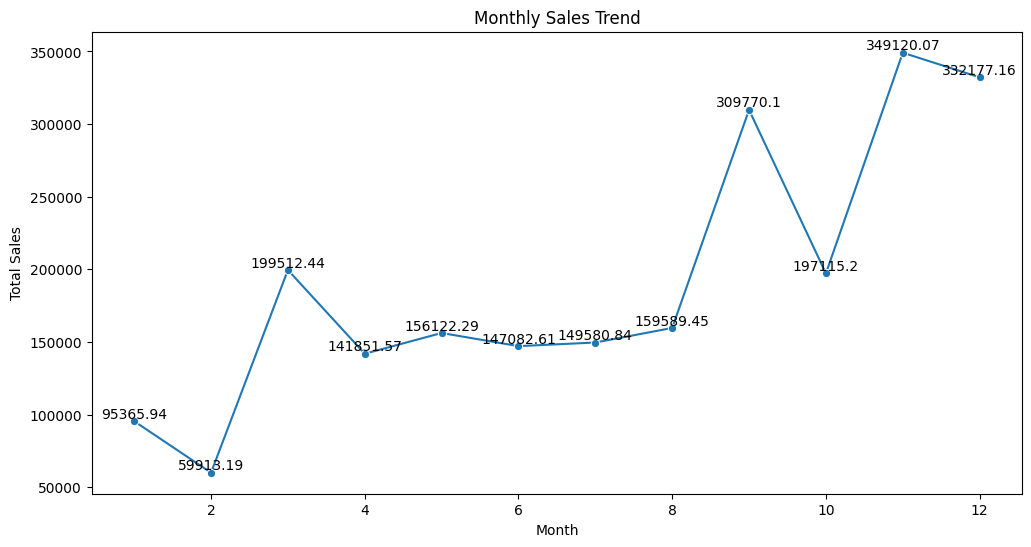

Kruskal-Wallis test for Monthly Sales: H-statistic=11.586980003676912, p-value=0.3954748935379292 (H0 diterima)


In [19]:
# Extract month and year for seasonal analysis
df_cleaned['Order Month'] = df_cleaned['Order Date'].dt.month
df_cleaned['Order Year'] = df_cleaned['Order Date'].dt.year

# Group by month and calculate total sales
monthly_sales = df_cleaned.groupby('Order Month')['Sales'].sum().reset_index()

# Kruskal-Wallis test to check for significant seasonal differences
sales_data_by_month = [df_cleaned[df_cleaned['Order Month'] == month]['Sales'] for month in df_cleaned['Order Month'].unique()]
kruskal_month_sales = kruskal(*sales_data_by_month)

# If-else function to state whether H0 is accepted or rejected
seasonality_significance = 'H0 diterima' if kruskal_month_sales.pvalue > 0.05 else 'H0 ditolak'

# Line plot for monthly sales with labels
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Order Month', y='Sales', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Add labels
for x, y in zip(monthly_sales['Order Month'], monthly_sales['Sales']):
    plt.text(x, y, round(y, 2), ha='center', va='bottom')

plt.show()

print(f"Kruskal-Wallis test for Monthly Sales: H-statistic={kruskal_month_sales.statistic}, p-value={kruskal_month_sales.pvalue} ({seasonality_significance})")


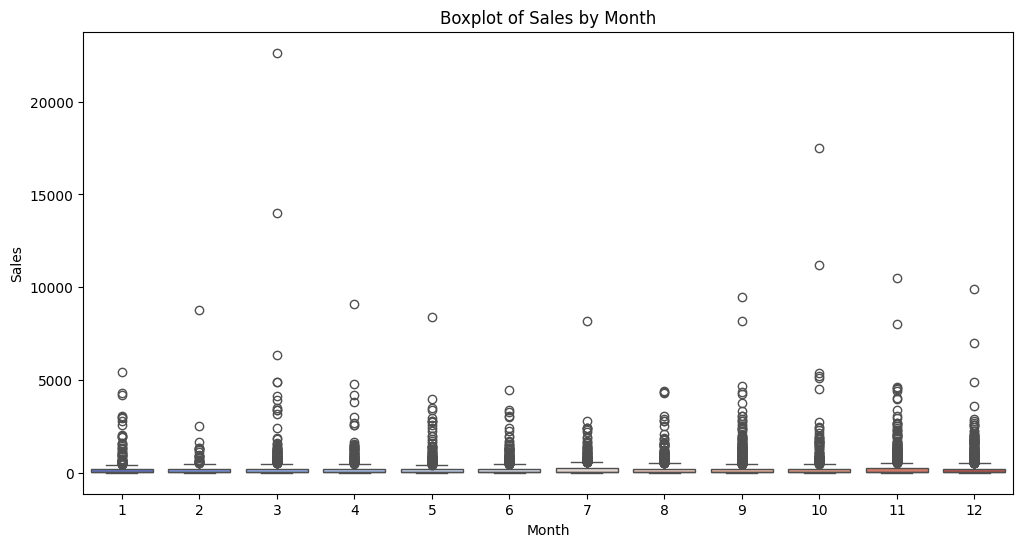

,count,mean,std,min,25%,50%,75%,max
Order Month,,,,,,,,
1,387.0,246.423611,592.567008,1.728,16.4840,51.940,185.35000,5443.960
2,298.0,201.050985,576.176234,1.080,17.5800,60.975,208.93075,8749.950
3,683.0,292.111918,1149.503338,0.556,18.6380,58.580,211.54300,22638.480
4,663.0,213.954099,555.805287,1.188,16.8740,50.120,202.44500,9099.930
5,750.0,208.163049,519.109118,1.188,17.4630,48.858,185.79200,8399.976
6,709.0,207.450792,421.773758,0.444,17.0880,51.980,201.58400,4476.800
7,708.0,211.272370,462.773541,1.044,15.6840,59.987,236.87500,8187.650
8,710.0,224.773875,468.271431,1.362,17.2500,54.856,212.51700,4416.174
9,1386.0,223.499350,552.455846,0.876,15.5835,49.755,199.49100,9449.950


In [20]:
# Descriptive statistics for Sales by Month
monthly_sales_stats = df_cleaned.groupby('Order Month')['Sales'].describe()

# Boxplot for Sales by Month
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='Order Month', y='Sales', palette='coolwarm')
plt.title('Boxplot of Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

monthly_sales_stats


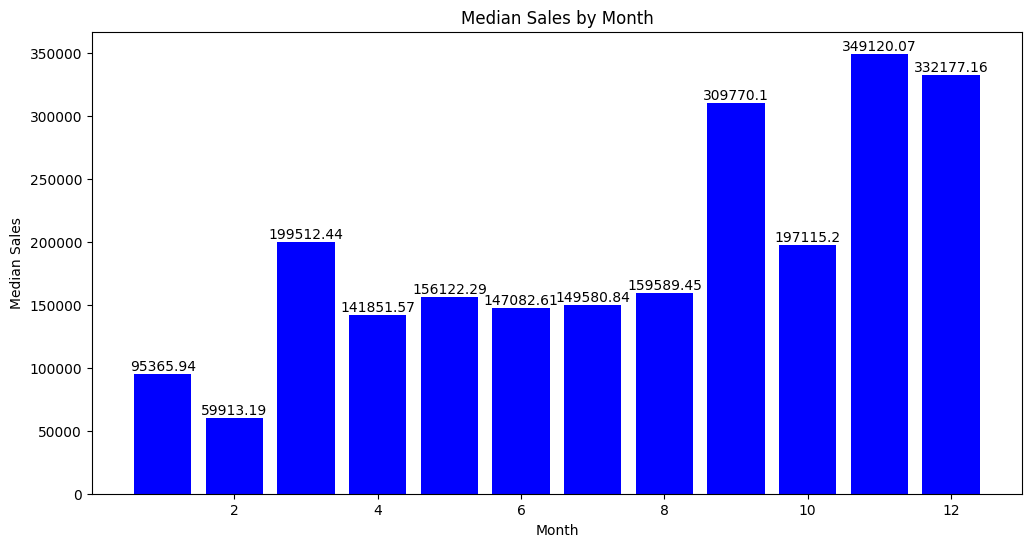

In [21]:
# Bar plot for Median Sales by Month
# Bar plot for Median Sales by Month with labels
plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_sales['Order Month'], monthly_sales['Sales'], color='blue')
plt.title('Median Sales by Month')
plt.xlabel('Month')
plt.ylabel('Median Sales')

# Add labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, round(yval, 2), ha='center', va='bottom')


# **Key Insight Dari visualisasi*

1. Kruskal-Wallis Test: Hasil uji Kruskal-Wallis menunjukkan apakah ada perbedaan signifikan dalam penjualan bulanan.
    - Insight: Jika H0 ditolak, ini menunjukkan adanya tren musiman yang signifikan dalam penjualan. Ini berarti penjualan mengalami variasi yang signifikan sepanjang tahun.


2. Monthly Sales Trend: Menunjukkan tren penjualan bulanan selama periode analisis.
    - Insight: Dengan mengidentifikasi bulan-bulan dengan penjualan tertinggi dan terendah, perusahaan dapat melihat pola musiman yang mungkin terjadi setiap tahun. Misalnya, jika bulan-bulan tertentu secara konsisten menunjukkan penjualan tinggi, ini dapat dikaitkan dengan faktor-faktor seperti musim liburan, promosi tahunan, atau perilaku pembelian pelanggan.

3. Boxplot of Sales by Month: Menunjukkan distribusi penjualan bulanan.
    - Insight: Boxplot memberikan gambaran tentang variasi penjualan dalam setiap bulan. Ini membantu mengidentifikasi outlier dan memahami distribusi data. Misalnya, jika ada bulan dengan penjualan yang sangat bervariasi, perusahaan dapat menyelidiki lebih lanjut untuk memahami faktor-faktor yang mempengaruhi variasi tersebut.


# *Rekomendasi Spesifik*
1. Optimalkan Inventaris Berdasarkan Tren Musiman:
    - Tindakan: Atur inventaris dan sumber daya berdasarkan bulan dengan penjualan tertinggi dan terendah untuk menghindari kelebihan atau kekurangan stok.

In [22]:
peak_months = monthly_sales[monthly_sales['Sales'] == monthly_sales['Sales'].max()]['Order Month']
low_months = monthly_sales[monthly_sales['Sales'] == monthly_sales['Sales'].min()]['Order Month']
print("Atur inventaris untuk bulan puncak:", peak_months.values)
print("Kurangi inventaris untuk bulan rendah:", low_months.values)

Atur inventaris untuk bulan puncak: [11]
Kurangi inventaris untuk bulan rendah: [2]


2. Strategi Pemasaran Musiman:

    - Tindakan: Lakukan kampanye pemasaran khusus selama bulan-bulan dengan penjualan rendah untuk meningkatkan penjualan.

In [23]:
low_sales_months = monthly_sales[monthly_sales['Sales'] < monthly_sales['Sales'].median()]['Order Month']
print("Lakukan kampanye pemasaran pada bulan-bulan berikut:", low_sales_months.values)

Lakukan kampanye pemasaran pada bulan-bulan berikut: [1 2 4 5 6 7]


3. Perencanaan Sumber Daya Manusia:

    - Tindakan: Atur jadwal kerja dan sumber daya manusia berdasarkan tren penjualan bulanan untuk memastikan ketersediaan staf yang memadai selama bulan-bulan sibuk.

In [24]:
busy_months = monthly_sales[monthly_sales['Sales'] > monthly_sales['Sales'].median()]['Order Month']
print("Atur jadwal kerja untuk bulan-bulan sibuk:", busy_months.values)

Atur jadwal kerja untuk bulan-bulan sibuk: [ 3  8  9 10 11 12]


# **SOAL 4.Produk mana yang memiliki margin profit tertinggi dan terendah, dan bagaimana variasinya di berbagai wilayah?**

Hipotesis:

- H0: Tidak ada perbedaan signifikan dalam margin profit produk di berbagai wilayah.
- H1: Ada perbedaan signifikan dalam margin profit produk di berbagai wilayah.

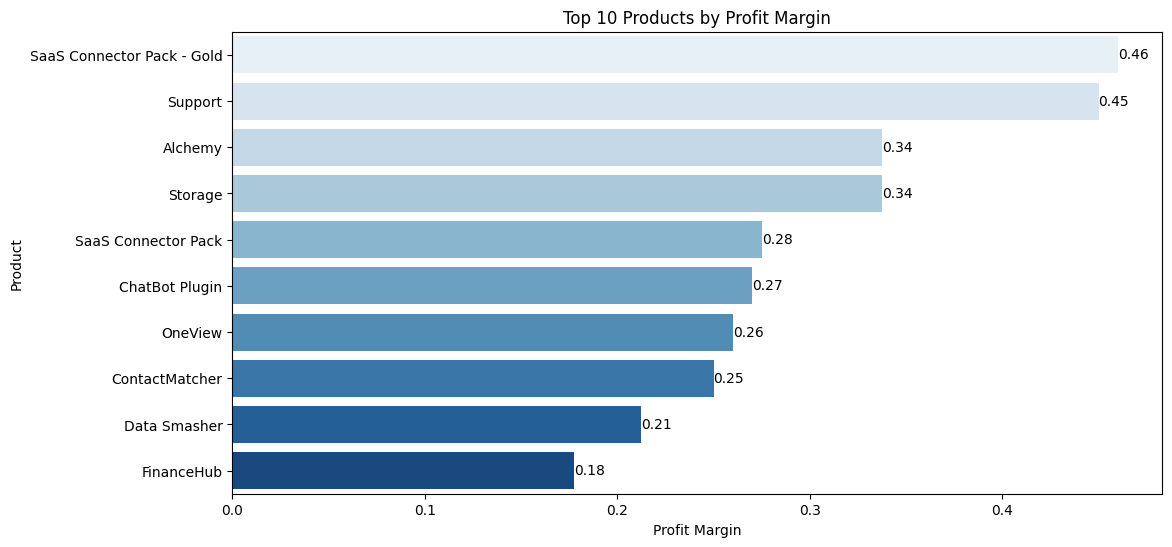

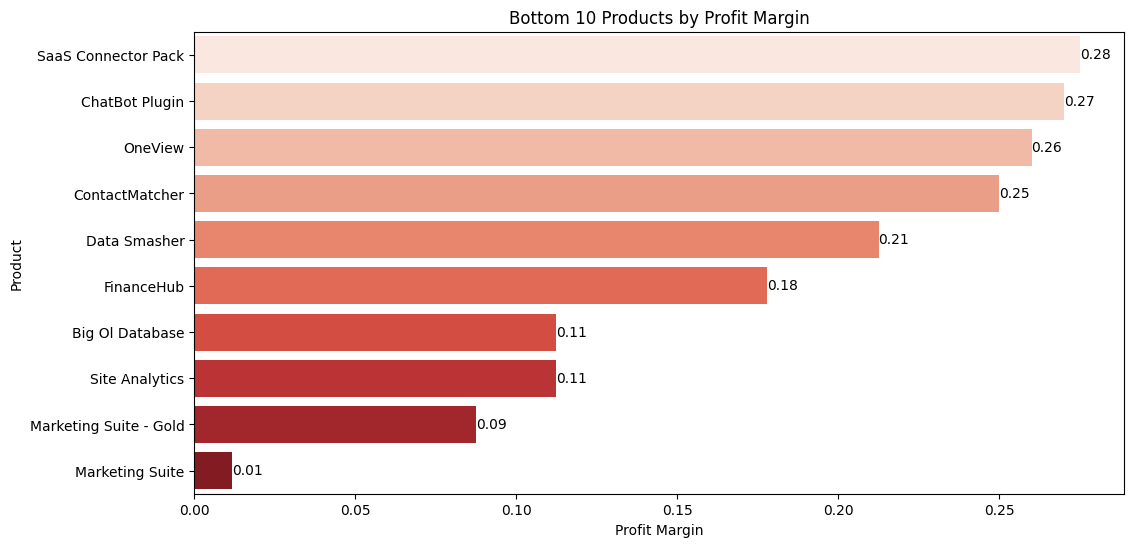

                       Product  Profit Margin
10  SaaS Connector Pack - Gold       0.460000
13                     Support       0.450000
0                      Alchemy       0.337500
12                     Storage       0.337500
9          SaaS Connector Pack       0.275000
2               ChatBot Plugin       0.270000
8                      OneView       0.260000
3               ContactMatcher       0.250000
4                 Data Smasher       0.212500
5                   FinanceHub       0.177778
1              Big Ol Database       0.112500
11              Site Analytics       0.112500
7       Marketing Suite - Gold       0.087500
6              Marketing Suite       0.011765


Kruskal-Wallis test for Profit Margin by Region: H-statistic=347.821432132988, p-value=2.961663195935875e-76 (H0 ditolak)


In [25]:
# Calculate Profit Margin
df_cleaned['Profit Margin'] = df_cleaned['Profit'] / df_cleaned['Sales']

# Identify products with highest and lowest profit margins
product_margin = df_cleaned.groupby('Product')['Profit Margin'].median().reset_index()
product_margin = product_margin.sort_values(by='Profit Margin', ascending=False)

# Top and Bottom Products by Profit Margin
top_products = product_margin.head(10)
bottom_products = product_margin.tail(10)

# Kruskal-Wallis test to check for significant differences between regions
margin_data_by_region = [df_cleaned[df_cleaned['Region'] == region]['Profit Margin'] for region in df_cleaned['Region'].unique()]
kruskal_margin_region = kruskal(*margin_data_by_region)

# If-else function to state whether H0 is accepted or rejected
region_significance = 'H0 diterima' if kruskal_margin_region.pvalue > 0.05 else 'H0 ditolak'

# Bar plot for Top 10 Products by Profit Margin with labels
plt.figure(figsize=(12, 6))
bars = sns.barplot(data=top_products, x='Profit Margin', y='Product', palette='Blues')
plt.title('Top 10 Products by Profit Margin')
plt.xlabel('Profit Margin')
plt.ylabel('Product')

# Add labels
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 2), ha='left', va='center')

plt.show()

# Bar plot for Bottom 10 Products by Profit Margin with labels
plt.figure(figsize=(12, 6))
bars = sns.barplot(data=bottom_products, x='Profit Margin', y='Product', palette='Reds')
plt.title('Bottom 10 Products by Profit Margin')
plt.xlabel('Profit Margin')
plt.ylabel('Product')

# Add labels
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 2), ha='left', va='center')

plt.show()

print(product_margin)
print(f"\n\nKruskal-Wallis test for Profit Margin by Region: H-statistic={kruskal_margin_region.statistic}, p-value={kruskal_margin_region.pvalue} ({region_significance})")


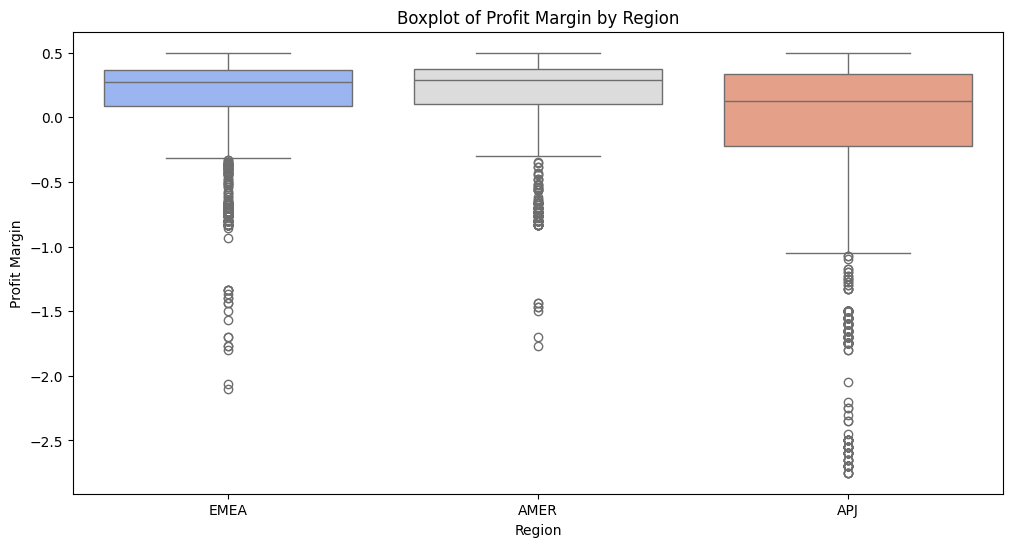

         count      mean       std       min       25%    50%     75%  max
Region                                                                    
AMER    3665.0  0.218749  0.270766 -1.766667  0.100000  0.290  0.3750  0.5
APJ     2110.0 -0.149975  0.762681 -2.750000 -0.222917  0.125  0.3375  0.5
EMEA    4219.0  0.169981  0.337906 -2.100000  0.087500  0.275  0.3625  0.5


In [26]:
# Descriptive statistics for Profit Margin by Region
region_margin_stats = df_cleaned.groupby('Region')['Profit Margin'].describe()

# Boxplot for Profit Margin by Region
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='Region', y='Profit Margin', palette='coolwarm')
plt.title('Boxplot of Profit Margin by Region')
plt.xlabel('Region')
plt.ylabel('Profit Margin')
plt.show()

print(region_margin_stats)


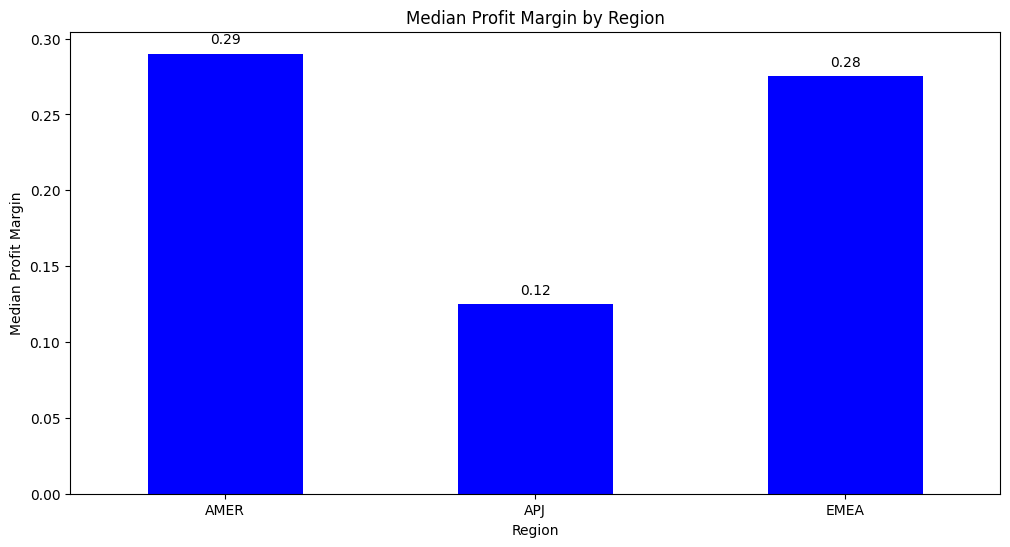

In [27]:
import matplotlib.pyplot as plt

# Bar plot for Median Profit Margin by Region with labels
plt.figure(figsize=(12, 6))
median_profit_margin = df_cleaned.groupby('Region')['Profit Margin'].median()
bars = median_profit_margin.plot(kind='bar', color='blue')
plt.title('Median Profit Margin by Region')
plt.xlabel('Region')
plt.ylabel('Median Profit Margin')

# Add labels
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.2f'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom',
                  xytext=(0, 5),  
                  textcoords='offset points',
                  rotation=0) 
    
    plt.xticks(rotation=0)

plt.show()



1. Kruskal-Wallis Test: Hasil uji Kruskal-Wallis menunjukkan apakah ada perbedaan signifikan dalam margin profit produk di berbagai wilayah.

    - Insight: Jika H0 ditolak, ini menunjukkan bahwa margin profit produk berbeda secara signifikan di berbagai wilayah. Perbedaan ini bisa disebabkan oleh faktor regional seperti biaya operasional yang berbeda, preferensi pelanggan yang bervariasi, atau tingkat persaingan yang berbeda di setiap wilayah.

2. Top 10 Products by Profit Margin: Menunjukkan produk dengan margin profit tertinggi.

    - Insight: Produk dengan margin profit tertinggi adalah produk yang paling menguntungkan bagi perusahaan. Produk-produk ini menunjukkan bahwa mereka memiliki kombinasi harga jual yang baik dan biaya produksi yang efisien.

3. Bottom 10 Products by Profit Margin: Menunjukkan produk dengan margin profit terendah.

    - Insight: Produk dengan margin profit terendah mungkin memiliki harga jual yang terlalu rendah atau biaya produksi yang terlalu tinggi. Ini bisa disebabkan oleh beberapa faktor seperti bahan baku yang mahal, biaya produksi yang tidak efisien, atau kurangnya permintaan pasar.

4. Boxplot of Profit Margin by Region: Menunjukkan distribusi margin profit di berbagai wilayah.

    - Insight: Variasi margin profit di berbagai wilayah menunjukkan bahwa ada faktor-faktor regional yang mempengaruhi profitabilitas produk. Wilayah dengan margin profit yang lebih rendah mungkin memerlukan strategi penjualan dan pemasaran yang berbeda untuk meningkatkan profitabilitas.

1. Fokus pada Produk dengan Margin Profit Tinggi:

Tindakan: Alokasikan lebih banyak sumber daya dan upaya pemasaran pada produk dengan margin profit tertinggi untuk memaksimalkan profitabilitas.

In [28]:
top_products_list = top_products['Product'].tolist()
top_products_list


['SaaS Connector Pack - Gold',
 'Support',
 'Alchemy',
 'Storage',
 'SaaS Connector Pack',
 'ChatBot Plugin',
 'OneView',
 'ContactMatcher',
 'Data Smasher',
 'FinanceHub']

2. Tinjau dan Optimalkan Produk dengan Margin Profit Rendah:

Tindakan: Tinjau kembali biaya produksi dan harga jual produk dengan margin profit rendah untuk meningkatkan profitabilitas. Jika perlu, pertimbangkan untuk menghentikan produk yang tidak menguntungkan.

In [29]:
bottom_products_list = bottom_products['Product'].tolist()
bottom_products_list

['SaaS Connector Pack',
 'ChatBot Plugin',
 'OneView',
 'ContactMatcher',
 'Data Smasher',
 'FinanceHub',
 'Big Ol Database',
 'Site Analytics',
 'Marketing Suite - Gold',
 'Marketing Suite']

3. Sesuaikan Strategi Penjualan Berdasarkan Wilayah:

Tindakan: Gunakan informasi margin profit berdasarkan wilayah untuk menyesuaikan strategi penjualan dan pemasaran di berbagai wilayah guna meningkatkan profitabilitas.

In [30]:
region_median_margin = df_cleaned.groupby('Region')['Profit Margin'].median().reset_index()
region_median_margin


,Region,Profit Margin
0,AMER,0.290
1,APJ,0.125
2,EMEA,0.275


### Kesimpulan dan Tindakan Rekomendasi

#### 1. Segmen pelanggan mana yang memberikan kontribusi terbesar terhadap total penjualan dan profit?

**Tindakan Rekomendasi:**

1. **Fokus Pemasaran pada Segmen Menguntungkan:**
   - **Tindakan:** Alokasikan lebih banyak sumber daya dan anggaran pemasaran untuk segmen yang memberikan kontribusi terbesar terhadap total penjualan dan profit. Dengan memprioritaskan segmen ini, PT K dapat meningkatkan return on investment (ROI) dari aktivitas pemasaran mereka.
   -
   - 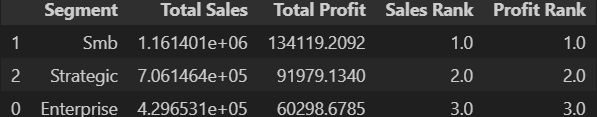

2. **Kembangkan Program Loyalitas atau Penawaran Khusus:**
   - **Tindakan:** Kembangkan program loyalitas atau penawaran khusus untuk segmen pelanggan yang kontribusinya lebih rendah untuk meningkatkan keterlibatan dan penjualan di segmen tersebut. Program loyalitas dapat mencakup diskon eksklusif, poin hadiah, atau akses prioritas ke produk baru.

3. **Peningkatan Keterlibatan Pelanggan di Segmen Berkinerja Rendah:**
   - **Tindakan:** Tingkatkan aktivitas keterlibatan pelanggan, seperti kampanye yang ditargetkan, webinar, atau sesi pelatihan, yang dirancang khusus untuk segmen berkinerja rendah. Ini dapat membantu memahami kebutuhan unik mereka dan menyesuaikan produk atau layanan untuk meningkatkan kepuasan dan loyalitas pelanggan.

#### 2. Bagaimana dampak diskon terhadap volume penjualan dan margin profit?

**Tindakan Rekomendasi:**

1. **Evaluasi dan Sesuaikan Kebijakan Diskon:**
   - **Tindakan:** Evaluasi kebijakan diskon saat ini dan sesuaikan berdasarkan analisis korelasi antara diskon dan penjualan/profit. Fokus pada rentang diskon yang menunjukkan hasil terbaik. Hasil analisis menunjukkan bahwa diskon 0-10% menghasilkan peningkatan penjualan yang optimal, pertimbangkan untuk mengimplementasikan diskon dalam rentang ini lebih sering.
   - 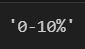

2. **Pengembangan Strategi Diskon Berdasarkan Segmen:**
   - **Tindakan:** Kembangkan strategi diskon yang disesuaikan untuk setiap segmen pelanggan berdasarkan dampak diskon terhadap penjualan dan profit di masing-masing segmen. Ini bisa mencakup diskon yang lebih agresif untuk segmen yang lebih sensitif terhadap harga atau penawaran khusus untuk pelanggan setia.
   - 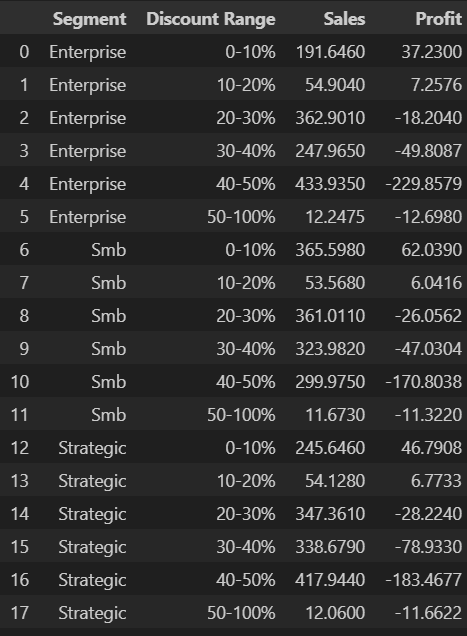

3. **Pemantauan Berkala dan Penyesuaian Diskon:**
   - **Tindakan:** Lakukan pemantauan berkala terhadap dampak diskon terhadap penjualan dan profit, dan lakukan penyesuaian sesuai dengan hasil analisis terkini. Dengan pemantauan yang terus-menerus, PT K dapat menyesuaikan strategi diskon mereka secara dinamis untuk memaksimalkan hasil.
   - 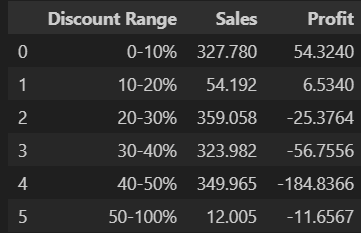

#### 3. Apa tren musiman dalam penjualan dan bagaimana kita dapat memanfaatkannya untuk perencanaan inventaris dan sumber daya yang lebih baik?

**Tindakan Rekomendasi:**

1. **Optimalkan Inventaris Berdasarkan Tren Musiman:**
   - **Tindakan:** Atur inventaris dan sumber daya berdasarkan bulan dengan penjualan tertinggi dan terendah untuk menghindari kelebihan atau kekurangan stok. Dengan mengetahui bulan-bulan puncak dan rendah, PT K dapat mengelola stok dengan lebih efisien dan mengurangi biaya penyimpanan.
   - 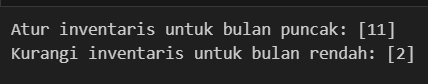

2. **Strategi Pemasaran Musiman:**
   - **Tindakan:** Lakukan kampanye pemasaran khusus selama bulan-bulan dengan penjualan rendah untuk meningkatkan penjualan. Misalnya, tawarkan promosi musim panas atau diskon akhir tahun untuk mendorong penjualan selama periode yang biasanya lebih lambat.
   - 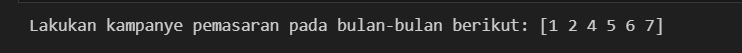

3. **Perencanaan Sumber Daya Manusia:**
   - **Tindakan:** Atur jadwal kerja dan sumber daya manusia berdasarkan tren penjualan bulanan untuk memastikan ketersediaan staf yang memadai selama bulan-bulan sibuk. Ini bisa mencakup penambahan staf sementara atau peningkatan jam kerja selama bulan-bulan puncak.
   - 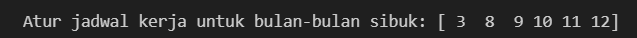

#### 4. Produk mana yang memiliki margin profit tertinggi dan terendah, dan bagaimana variasinya di berbagai wilayah?

**Tindakan Rekomendasi:**

1. **Fokus pada Produk dengan Margin Profit Tinggi:**
   - **Tindakan:** Alokasikan lebih banyak sumber daya dan upaya pemasaran pada produk dengan margin profit tertinggi untuk memaksimalkan profitabilitas. Pertimbangkan juga untuk memperluas lini produk serupa atau mengembangkan varian baru dari produk ini.
   - 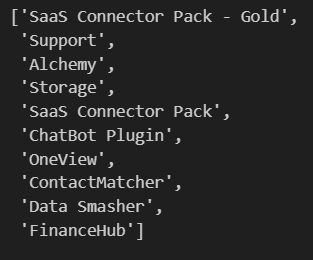
   
2. **Tinjau dan Optimalkan Produk dengan Margin Profit Rendah:**
   - **Tindakan:** Tinjau kembali biaya produksi dan harga jual produk dengan margin profit rendah untuk meningkatkan profitabilitas. Jika perlu, pertimbangkan untuk menghentikan produk yang tidak menguntungkan atau menggantinya dengan produk yang lebih menguntungkan.
   - 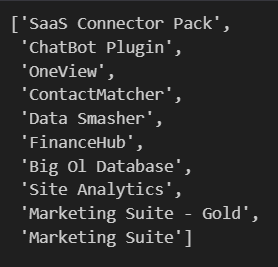

3. **Sesuaikan Strategi Penjualan Berdasarkan Wilayah:**
   - **Tindakan:** Gunakan informasi margin profit berdasarkan wilayah untuk menyesuaikan strategi penjualan dan pemasaran di berbagai wilayah guna meningkatkan profitabilitas. Ini bisa mencakup penyesuaian harga atau strategi distribusi yang berbeda di wilayah dengan margin profit rendah.
   - 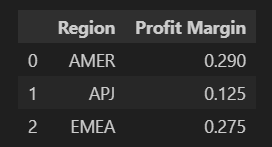